In [64]:
# Setup matplotlib to plot inline (within the notebook)
%matplotlib inline

# Import the pyplot module of Matplotlib as plt
import matplotlib.pyplot as plt

# Import pandas under the abbreviation 'pd'
import pandas as pd

# Import NumPy under the abbreviation 'np'
import numpy as np

import seaborn as sns

In [65]:
titanic_train_df=pd.read_csv("train.csv")

In [66]:
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [67]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [68]:
titanic_train_df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

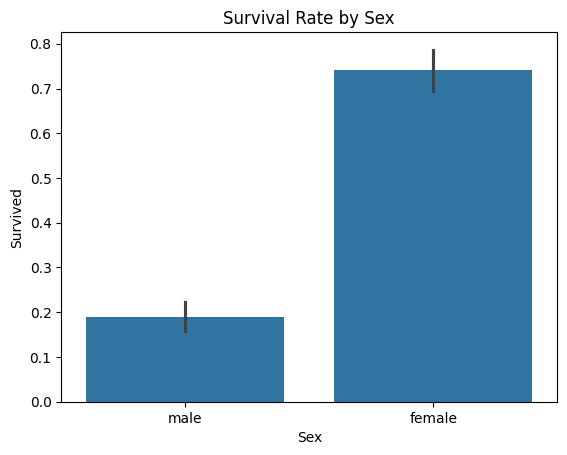

In [69]:


sns.barplot(x="Sex", y="Survived", data=titanic_train_df)
plt.title("Survival Rate by Sex")
plt.show()

In [70]:
bins = [0, 12, 18, 35, 50, 80]
labels = ['0-12', '12-18', '18-35', '35-50', '50-80']

titanic_train_df['AgeGroup'] = pd.cut(
    titanic_train_df['Age'], 
    bins=bins, 
    labels=labels
)



In [71]:
titanic_train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    int64   
 2   Pclass       891 non-null    int64   
 3   Name         891 non-null    object  
 4   Sex          891 non-null    object  
 5   Age          714 non-null    float64 
 6   SibSp        891 non-null    int64   
 7   Parch        891 non-null    int64   
 8   Ticket       891 non-null    object  
 9   Fare         891 non-null    float64 
 10  Cabin        204 non-null    object  
 11  Embarked     889 non-null    object  
 12  AgeGroup     714 non-null    category
dtypes: category(1), float64(2), int64(5), object(5)
memory usage: 84.7+ KB


<Axes: xlabel='AgeGroup', ylabel='count'>

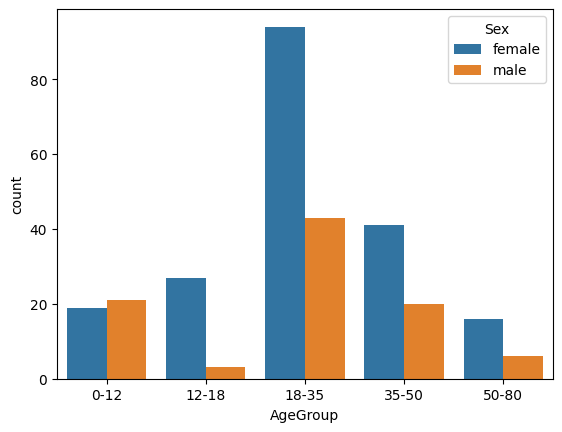

In [72]:
sns.countplot(data=titanic_train_df[titanic_train_df['Survived']==1],x='AgeGroup',hue='Sex')

In [73]:
# Import Pipeline from sklearn's pipeline module
from sklearn.pipeline import Pipeline

# Import ColumnTransformer from sklearn's compose module
from sklearn.compose import ColumnTransformer

# Import SimpleImputer from sklearn's impute module
from sklearn.impute import SimpleImputer

# Import OneHotEncoder from sklearn's preprocessing module
from sklearn.preprocessing import OneHotEncoder

# Import train_test_split from sklearn's model_selection module
from sklearn.model_selection import train_test_split

In [74]:
#data processing
titanic_train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,18-35
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,35-50
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,18-35
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,18-35
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,18-35


In [75]:
titanic_train_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'AgeGroup'],
      dtype='object')

In [76]:
#Feature engineering
from sklearn.preprocessing import FunctionTransformer

def extract_deck(df):
    df=df.copy()
    df['Deck']=df['Cabin'].str[0]
    return df

def extract_title(df):
    df=df.copy()
    df['Title']=df['Name'].str.extract(r', ([A-Za-z]+)\.')
    return df
def extract_ticket(df):
    df=df.copy()
    df['Ticket_prefix'] = df['Ticket'].str.extract(r'([A-Za-z\.\/]+)')
    # fill missing with 'None'
    df['Ticket_prefix'] = df['Ticket_prefix'].fillna('None')
    return df
deck_extract_transormer=FunctionTransformer(extract_deck)
title_extract_transformer=FunctionTransformer(extract_title)
ticket_extract_transformer=FunctionTransformer(extract_ticket)

In [77]:
# creating tranformers
name_feature=['Name']
name_transformer=Pipeline(steps=[('extract_title',title_extract_transformer),
                                 ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                 ('onehot',OneHotEncoder(handle_unknown='ignore'))])

ticket_feature=['Ticket']
ticket_transformer=Pipeline(steps=[('extract_ticket',ticket_extract_transformer),
                                   ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                   ('onehot',OneHotEncoder(handle_unknown='ignore'))])
cabin_feature=['Cabin']
cabin_transformer=Pipeline(steps=[('extract_deck',deck_extract_transormer),
                                   ('imputer',SimpleImputer(strategy='constant',fill_value='missing')),
                                   ('onehot',OneHotEncoder(handle_unknown='ignore'))])

categorical_feature=['Sex','Embarked']
categorical_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='most_frequent')),
                                   ('onehot',OneHotEncoder(handle_unknown='ignore'))])
numeric_features=['Age']
numeric_transformer=Pipeline(steps=[('imputer',SimpleImputer(strategy='median'))])

In [78]:
preprocessor=ColumnTransformer(transformers=[('name',name_transformer,name_feature),
                                             ('ticket',ticket_transformer,ticket_feature),
                                             ('cabin',cabin_transformer,cabin_feature),
                                             ('cat',categorical_transformer,categorical_feature),
                                             ('num',numeric_transformer,numeric_features)])

In [79]:
X=titanic_train_df[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]
y=titanic_train_df['Survived']

In [80]:
titanic_X_train, titanic_X_test, titanic_y_train, titanic_y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [81]:
titanic_X_train.shape, titanic_X_test.shape, titanic_y_train.shape, titanic_y_test.shape

((712, 10), (179, 10), (712,), (179,))

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier


In [83]:
classification_models = {"LogisticRegression": LogisticRegression(max_iter=1000, solver="lbfgs", random_state=42),
                     "RandomForestClassifier": RandomForestClassifier(n_estimators=200, random_state=42, n_jobs=-1),
                     "XGBClassifier": XGBClassifier(n_estimators=300, learning_rate=0.05, max_depth=4,
                                   subsample=0.8, colsample_bytree=0.8,
                                   random_state=42, use_label_encoder=False, eval_metric="logloss")}

# Create an empty dictionary for the regression results
classification_results = {}

In [84]:
for model_name, model in classification_models.items():

    model_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                                   ('model',model)])
    print(f'Fitting {model_name}...')
    model_pipeline.fit(titanic_X_train,titanic_y_train)

    print(f'Scoring {model_name}...')
    classification_results[model_name]=model_pipeline.score(titanic_X_test,titanic_y_test)
    

Fitting LogisticRegression...
Scoring LogisticRegression...
Fitting RandomForestClassifier...
Scoring RandomForestClassifier...
Fitting XGBClassifier...


c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:44:05] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


Scoring XGBClassifier...


In [85]:
classification_results

{'LogisticRegression': 0.8324022346368715,
 'RandomForestClassifier': 0.8268156424581006,
 'XGBClassifier': 0.7988826815642458}

In [88]:
#Hypertuning best model 
np.random.seed(42)
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import uniform
param_distributions = {
    'model__C': uniform(0.01, 10),         # C between 0.01 and 10
    'model__penalty': ['l1', 'l2', 'elasticnet'],
    'model__solver': ['liblinear', 'saga'],
    'model__max_iter': [100, 500, 1000],
}

In [90]:
logsiticRegression_pipeline=Pipeline(steps=[('preprocessor',preprocessor),
                                   ('model',LogisticRegression())])
randomized_search_lr=RandomizedSearchCV(estimator=logsiticRegression_pipeline,
                                param_distributions=param_distributions,
                                cv=5,
                                n_iter=5,
                                verbose=True)
randomized_search_lr.fit(titanic_X_train,titanic_y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
c:\Users\RaafatZiade\Desktop\The AI Engineer\Titanic\myenv\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reac

,estimator,Pipeline(step...egression())])
,param_distributions,"{'model__C': <scipy.stats....00232FEA43510>, 'model__max_iter': [100, 500, ...], 'model__penalty': ['l1', 'l2', ...], 'model__solver': ['liblinear', 'saga']}"
,n_iter,5
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,True
,pre_dispatch,'2*n_jobs'
,random_state,None
,error_score,nan


In [91]:
randomized_search_lr.best_params_

{'model__C': np.float64(6.126531604882809),
 'model__max_iter': 100,
 'model__penalty': 'l1',
 'model__solver': 'liblinear'}

In [107]:
# Import confusion_matrix and classification_report from sklearn's metrics module
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

# Import precision_score, recall_score and f1_score from sklearn's metrics module
from sklearn.metrics import precision_score, recall_score, f1_score
# Import plot_roc_curve from sklearn's metrics module
from sklearn.metrics import RocCurveDisplay
import matplotlib.pyplot as plt
best_logreg =Pipeline(steps=[('preprocessor',preprocessor),('best logR', LogisticRegression(
    C=6.126531604882809,
    max_iter=100,
    penalty='l1',
    solver='liblinear'))])

In [131]:
best_logreg.fit(titanic_X_train,titanic_y_train)


,steps,"[('preprocessor', ...), ('best logR', ...)]"
,transform_input,None
,memory,None
,verbose,False
,transformers,"[('name', ...), ('ticket', ...), ...]"
,remainder,'drop'
,sparse_threshold,0.3
,n_jobs,None
,transformer_weights,None
,verbose,False
,verbose_feature_names_out,True


In [101]:
y_predict=best_logreg.predict(titanic_X_test)

In [105]:
a=confusion_matrix(titanic_y_test,y_predict)

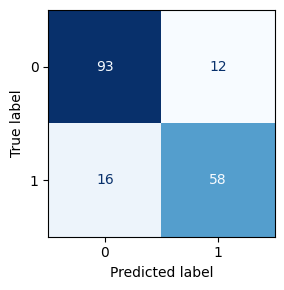

In [106]:
from sklearn.metrics import ConfusionMatrixDisplay
fig, ax = plt.subplots(figsize=(3,3))
ConfusionMatrixDisplay(a).plot(cmap="Blues", colorbar=False, values_format="d", ax=ax)
ax.set_xlabel("Predicted label"); ax.set_ylabel("True label")
plt.tight_layout(); plt.show()

In [108]:
print(classification_report(titanic_y_test,y_predict))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87       105
           1       0.83      0.78      0.81        74

    accuracy                           0.84       179
   macro avg       0.84      0.83      0.84       179
weighted avg       0.84      0.84      0.84       179



In [109]:
#cross-validation evaluation
from sklearn.model_selection import cross_val_score

In [110]:
cross_val_score(best_logreg, 
                X, 
                y, 
                scoring="accuracy",
                cv=5)

array([0.86592179, 0.8258427 , 0.83146067, 0.81460674, 0.88202247])

In [112]:
cross_val_acc = np.mean(cross_val_score(best_logreg,
                                        X,
                                        y,
                                        scoring="accuracy",
                                        cv=5))

cross_val_acc

np.float64(0.8417299604544599)

In [114]:
cross_val_precision = np.mean(cross_val_score(best_logreg,
                                              X,
                                              y,
                                              scoring="precision",
                                              cv=5))
cross_val_precision

np.float64(0.8277266150952979)

In [115]:
cross_val_recall = np.mean(cross_val_score(best_logreg,
                                           X,
                                           y,
                                           scoring="recall",
                                           cv=5))

cross_val_recall

np.float64(0.7598039215686275)

In [116]:
cross_val_f1 = np.mean(cross_val_score(best_logreg,
                                       X,
                                       y,
                                       scoring="f1",
                                       cv=5))

cross_val_f1

np.float64(0.7880810049602147)

In [117]:
#Predit on real values from test.csv 
test_df=pd.read_csv('test.csv')

In [118]:
test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [120]:
test_df.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [127]:
x_prime=test_df[['Pclass','Name','Sex','Age','SibSp','Parch','Ticket','Fare','Cabin','Embarked']]

#one fare value missing, lets drop it!
x_prime=x_prime.dropna(subset='Fare',axis=0)



In [129]:
# making sure all is set before predicting
x_prime.isna().sum()

Pclass        0
Name          0
Sex           0
Age          86
SibSp         0
Parch         0
Ticket        0
Fare          0
Cabin       326
Embarked      0
dtype: int64

In [133]:
#great lets predict
predictions=best_logreg.predict(x_prime)

In [138]:
x_fixed=test_df.dropna(subset='Fare',axis=0)
submission = pd.DataFrame({
    "PassengerId":x_fixed["PassengerId"],
    "Survived": predictions})

In [139]:
submission.to_csv("titanic_prediction_submission.csv", index=False)

In [140]:
submission.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
